# STFT (Short Time Fourier Transform) test

cf) https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import stft
import numpy as np

In [2]:
fs = 10e3  # sampling frequency (default = 10kHz)
N = 1e5
amp = 2 * 2 ** 0.5
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500 * np.cos(2 * np.pi * 0.25 * time)
carrier = amp * np.sin(2 * np.pi * 3e3 * time + mod)  # modulates around 3kHz
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time / 5)  # exponentially decaying noise
x = carrier + noise

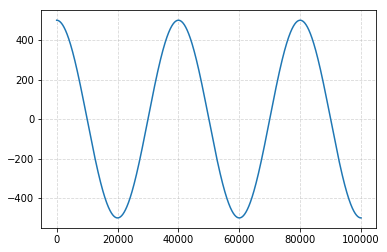

In [3]:
plt.plot(mod);

`carrier` contians frequencies around 3kHz. The plot below doesn't look so obvious as `carrier` is perturbated by adding `mod`.

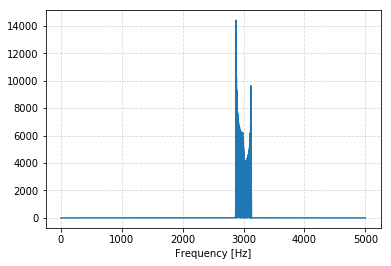

In [11]:
fig, ax = plt.subplots()

ax.plot(np.linspace(0, fs / 2, int(N//2)),
                    np.abs(fft(carrier)[0:int(N//2)]))
ax.set_xlabel('Frequency [Hz]');

Exponentially decaying noise is also added to `carrier`.

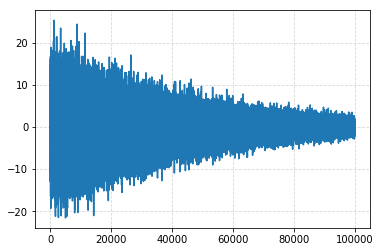

In [13]:
plt.plot(noise);

## Apply STFT

number of samples = 100000  
`nperseg` = 1000  
`noverlap` = `nperseg` // 2 = 500  
`nfft` = `nperseg`

One can see from below that the main frequency evolved around 3kHz. In addition, the plot contains white noise evenly distributed in the frequency domain up until around 2 second. This is because white noise theoretically carries all frequencies.

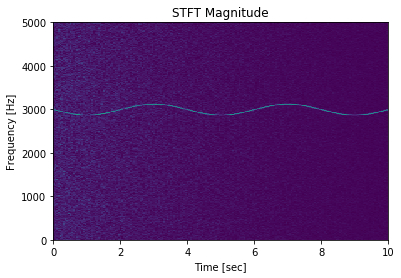

In [14]:
f, t, Zxx = stft(x, fs, nperseg=1000)

fig, ax = plt.subplots()
ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]');

In [23]:
print(f.shape)
print(t.shape)
print(Zxx.shape)

(501,)
(201,)
(501, 201)
